# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Nabila Jauza Firjatullah
- Email: nabilazafirlla@gmail.com
- Id Dicoding: billa_firza

## Persiapan

### Menyiapkan library yang dibutuhkan

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

### Menyiapkan data yang akan diguankan

## Data Understanding

### EDA

In [52]:
# Memuat data
data = pd.read_csv('data/employee_data.csv')

# Menampilkan informasi data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [53]:
# Menampilkan beberapa baris pertama data
print(data.head())

   EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         2            80   
1              1  ...                         1     

In [54]:
# Menampilkan statistik deskriptif
print(data.describe())

        EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1058.000000  1470.000000       1470.000000   
mean    735.500000    36.923810     0.169187   802.485714          9.192517   
std     424.496761     9.135373     0.375094   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     368.250000    30.000000     0.000000   465.000000          2.000000   
50%     735.500000    36.000000     0.000000   802.000000          7.000000   
75%    1102.750000    43.000000     0.000000  1157.000000         14.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1470.000000         1470.0              1470.000000  1470.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.024165            0.0                 1.093082    2

In [55]:
# Menampilkan statistik deskriptif untuk kolom kategorikal
print(data.describe(include=['O']))

       BusinessTravel              Department EducationField Gender  \
count            1470                    1470           1470   1470   
unique              3                       3              6      2   
top     Travel_Rarely  Research & Development  Life Sciences   Male   
freq             1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054  


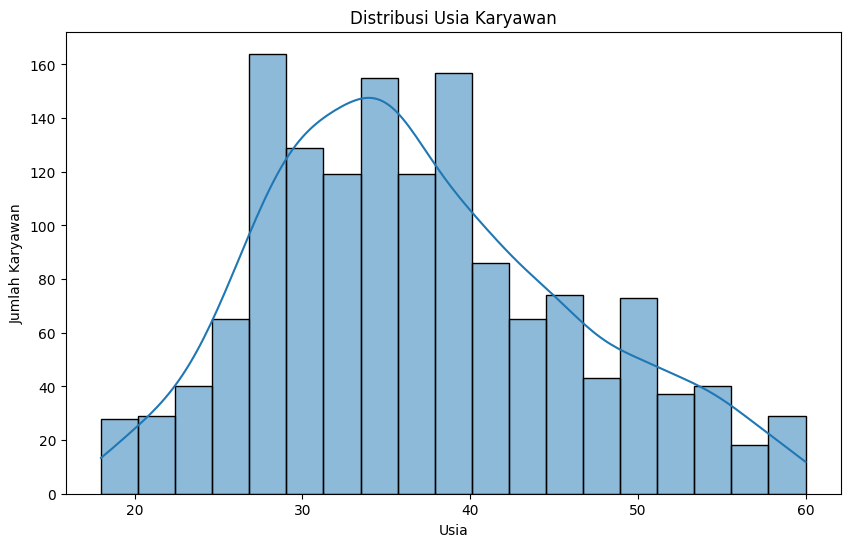

In [56]:
# Memvisualisasikan distribusi data
# Distribusi umur
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribusi Usia Karyawan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Karyawan')
plt.show()

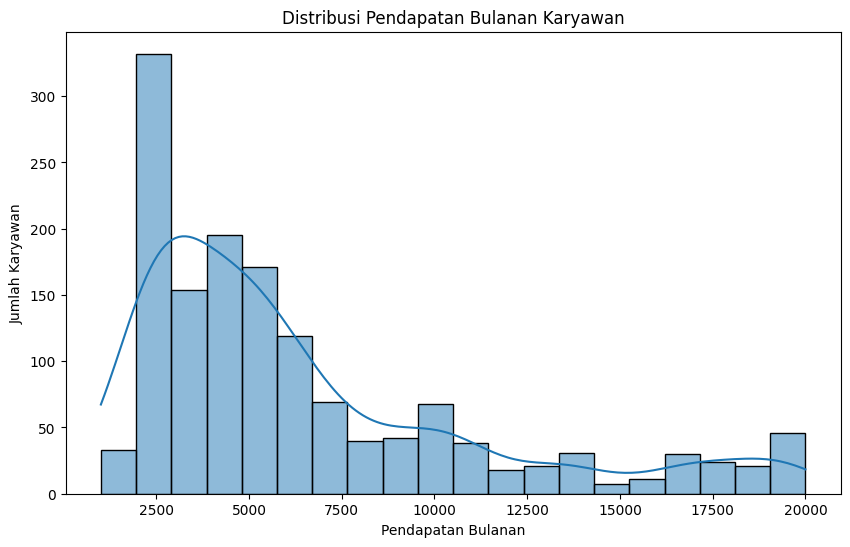

In [57]:
# Distribusi pendapatan bulanan
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyIncome'], kde=True)
plt.title('Distribusi Pendapatan Bulanan Karyawan')
plt.xlabel('Pendapatan Bulanan')
plt.ylabel('Jumlah Karyawan')
plt.show()

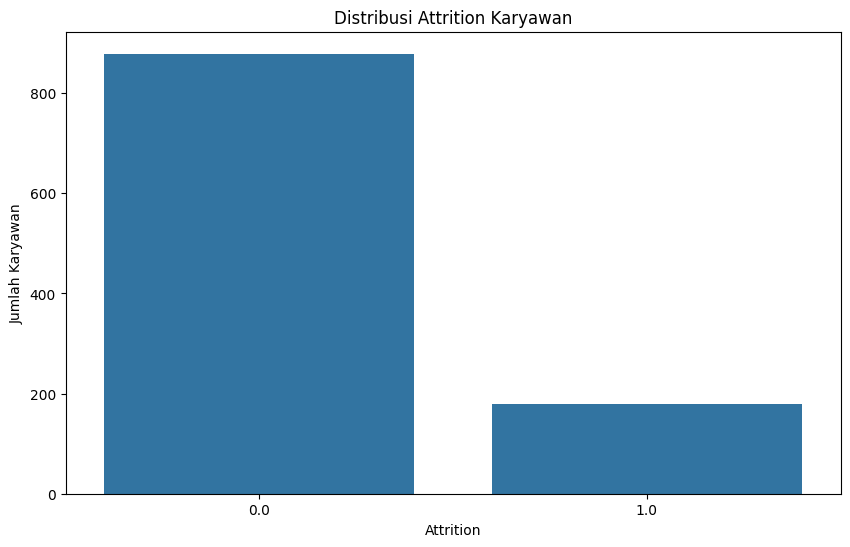

In [58]:
# Distribusi attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=data)
plt.title('Distribusi Attrition Karyawan')
plt.xlabel('Attrition')
plt.ylabel('Jumlah Karyawan')
plt.show()

In [59]:
# Memeriksa missing values
missing_values = data.isnull().sum()
print('Missing Values per Column:')
print(missing_values)

Missing Values per Column:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalan

In [60]:
# Membuat salinan data untuk rekayasa fitur
data_raw_encoded = data.copy()

# Menggunakan LabelEncoder untuk kolom kategorikal
label_encoders = {}
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18']

for column in categorical_columns:
    le = LabelEncoder()
    data_raw_encoded[column] = le.fit_transform(data_raw_encoded[column])
    label_encoders[column] = le
    
# Menampilkan beberapa baris pertama data setelah encoding
print(data_raw_encoded.head())

   EmployeeId  Age  Attrition  BusinessTravel  DailyRate  Department  \
0           1   38        NaN               1       1444           0   
1           2   37        1.0               2       1141           1   
2           3   51        1.0               2       1323           1   
3           4   42        0.0               1        555           2   
4           5   40        NaN               2       1194           1   

   DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0                 1          4               4              1  ...   
1                11          2               3              1  ...   
2                 4          4               1              1  ...   
3                26          3               2              1  ...   
4                 2          4               3              1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         2             80                 1   
1                 

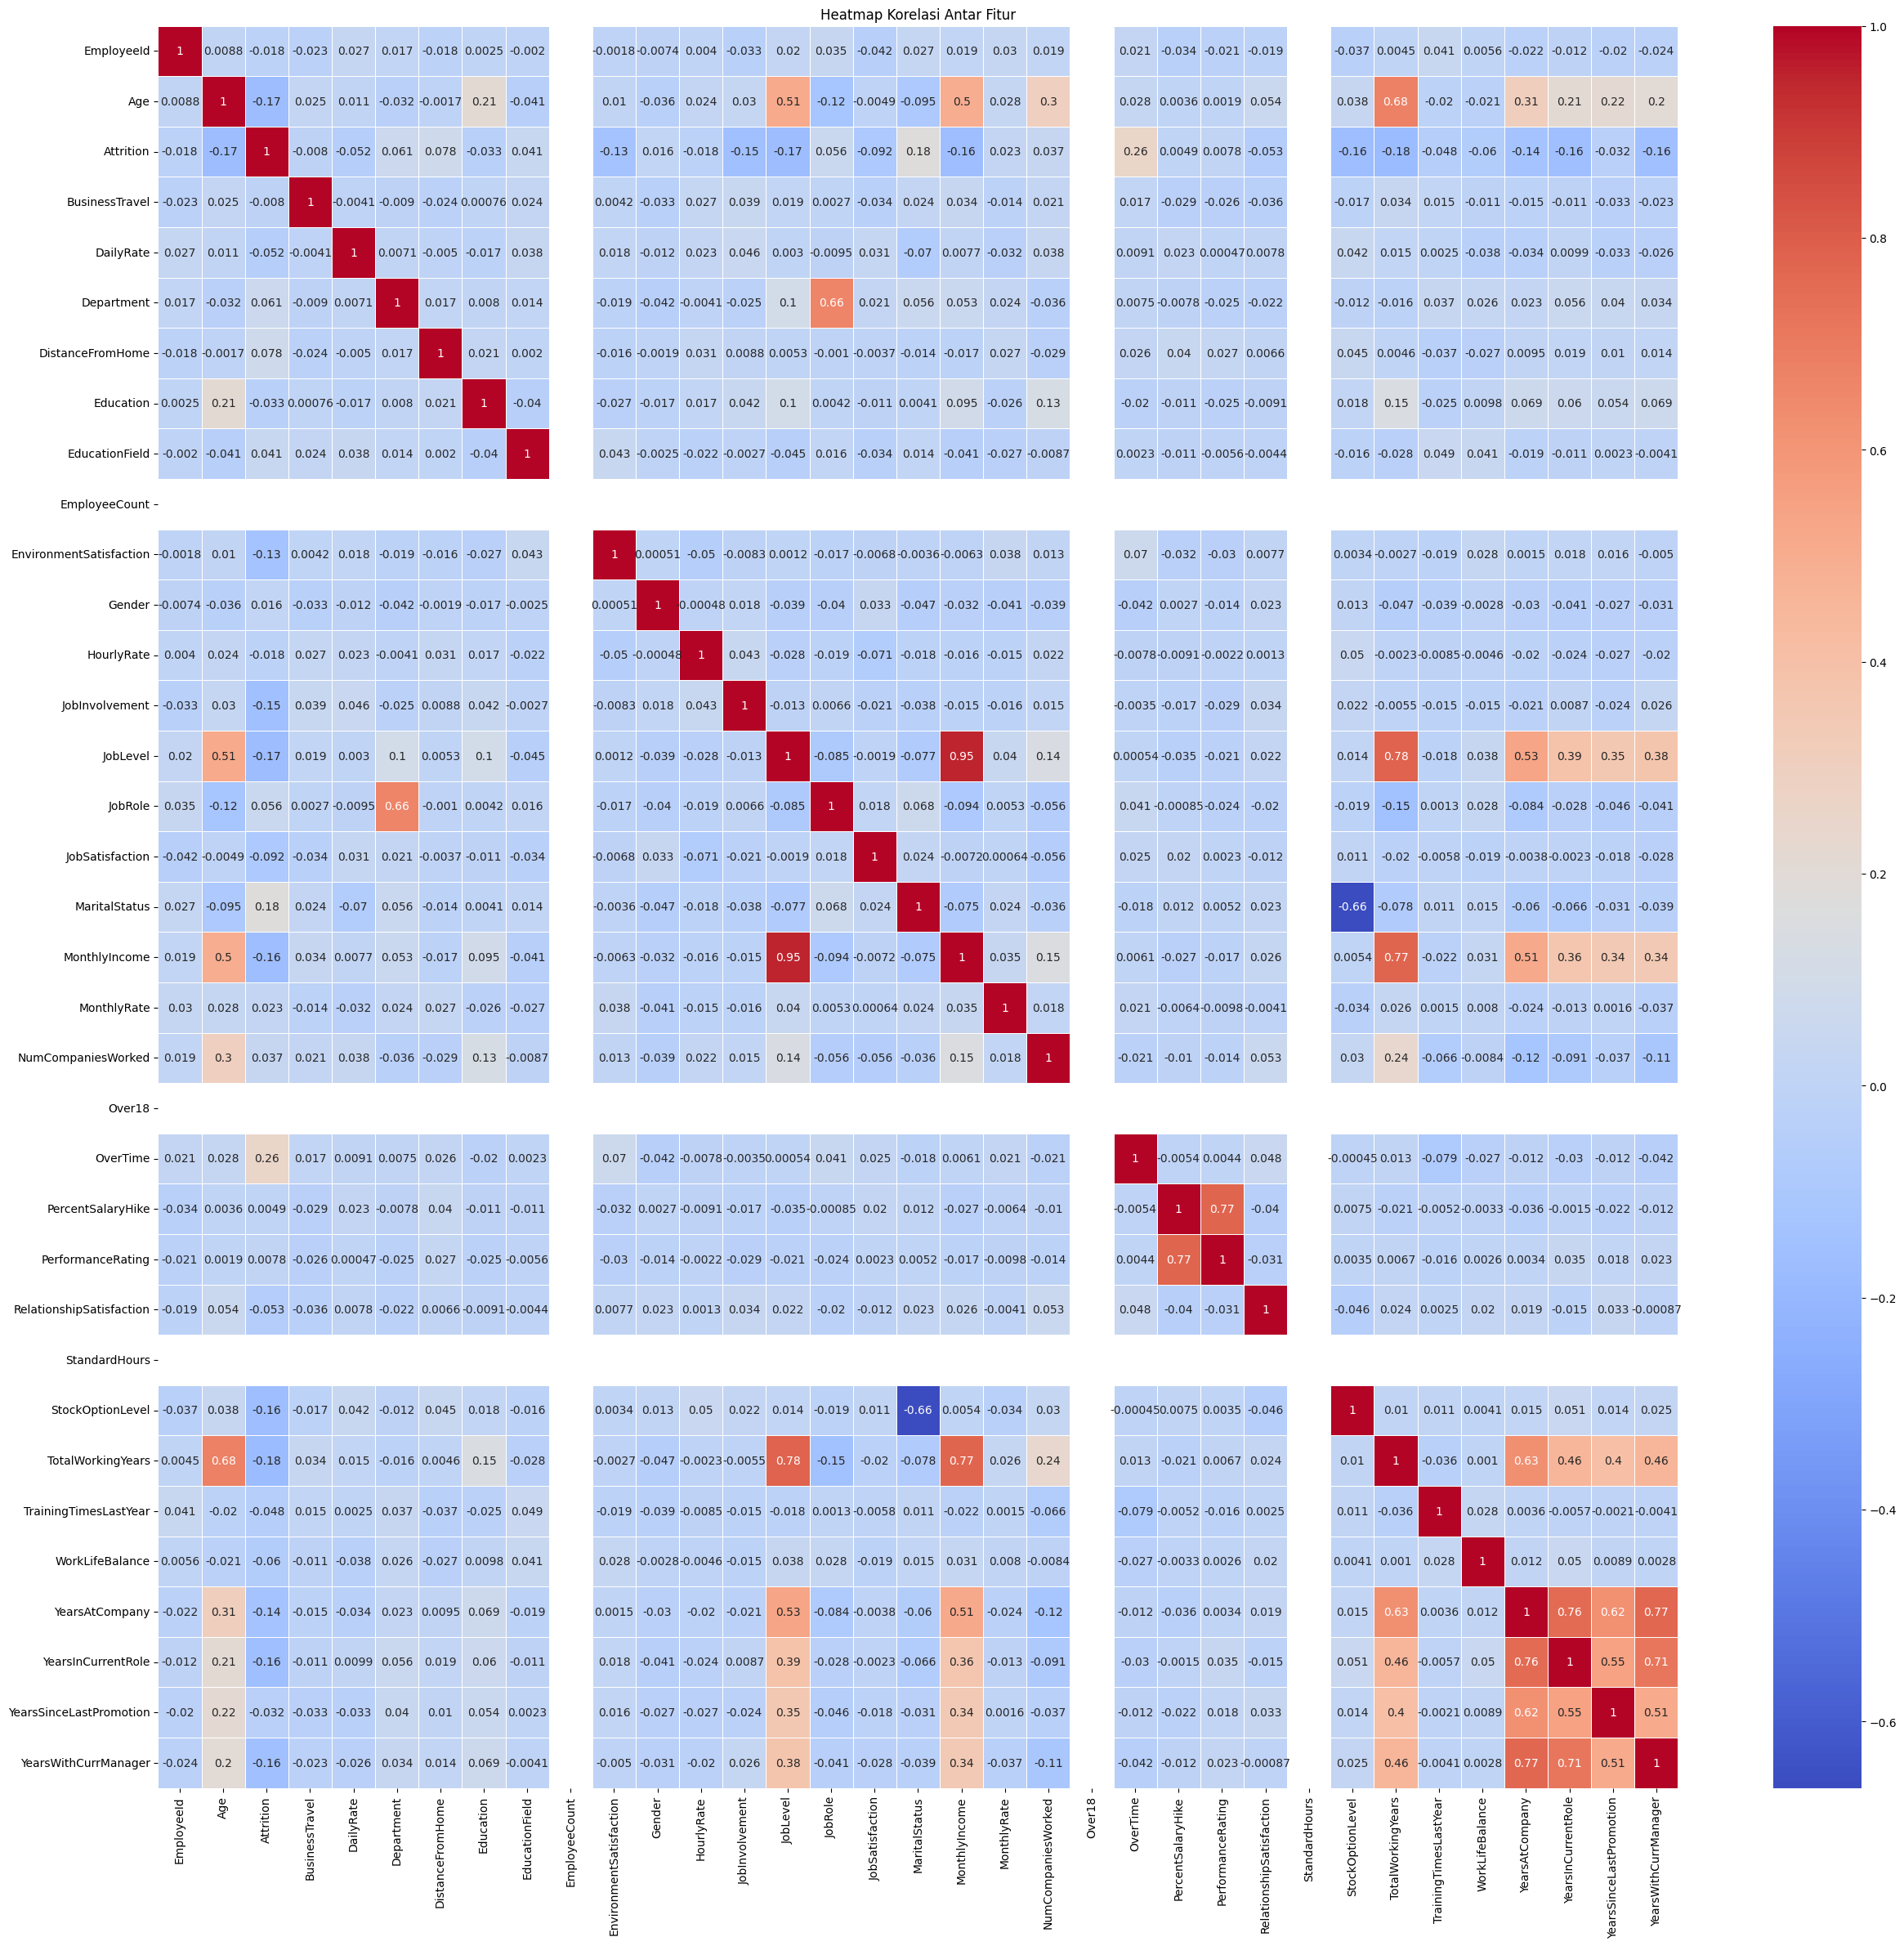

In [61]:
# Menghitung korelasi antar fitur
correlation_matrix = data_raw_encoded.corr()
plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

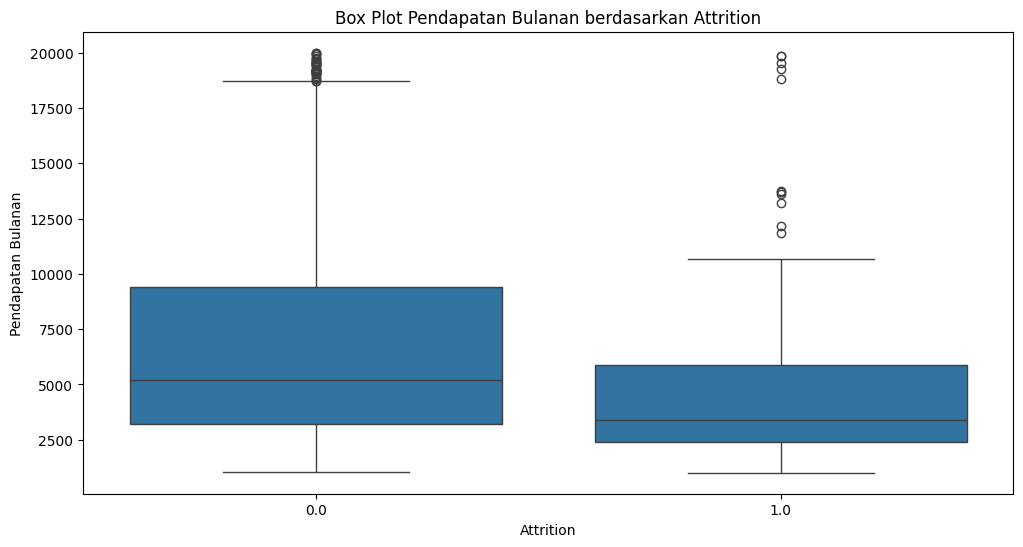

In [62]:
# Visualisasi Box Plot untuk beberapa fitur penting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Box Plot Pendapatan Bulanan berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('Pendapatan Bulanan')
plt.show()

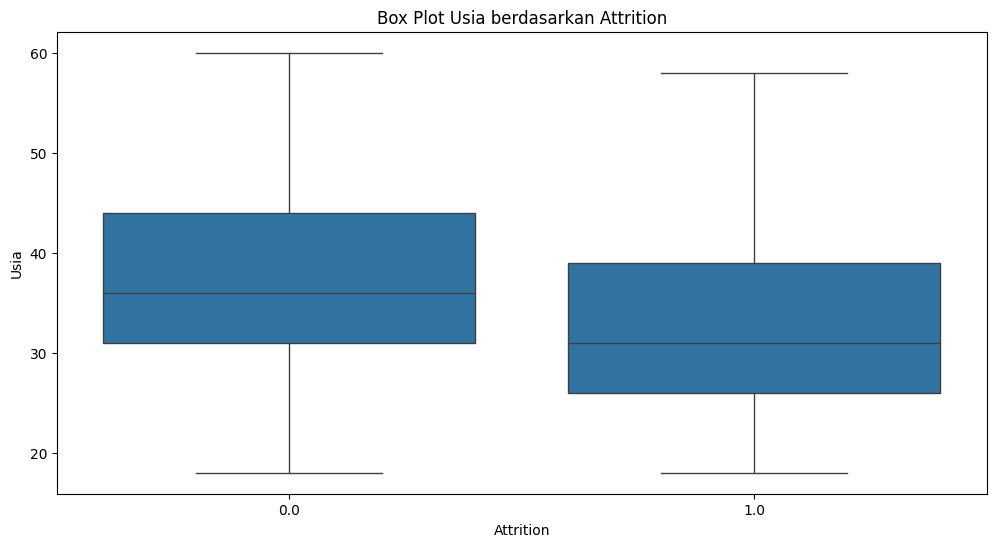

In [63]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Box Plot Usia berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('Usia')
plt.show()

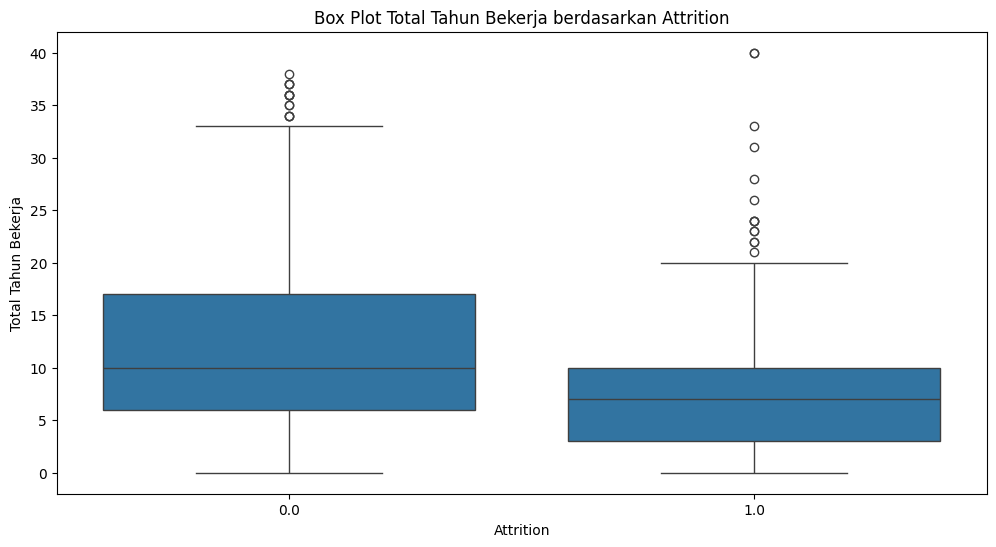

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=data)
plt.title('Box Plot Total Tahun Bekerja berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('Total Tahun Bekerja')
plt.show()

### Data Cleaning

In [65]:
# Mengisi nilai yang hilang di kolom 'Attrition' dengan median
data['Attrition'].fillna(data['Attrition'].median(), inplace=True)

# Menghapus kolom yang tidak diperlukan
data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [66]:
# Memeriksa missing values
missing_values = data.isnull().sum()
print('Missing Values per Column:')
print(missing_values)

Missing Values per Column:
EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [67]:
# Menampilkan informasi data setelah pembersihan
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1470 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [68]:
# Menampilkan beberapa baris pertama data setelah pembersihan
print(data.head())

   EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        0.0  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        0.0      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        4  ...                 3                         2   
1                       

## Data Preparation / Preprocessing

In [69]:
# Membuat salinan data untuk rekayasa fitur
data_encoded = data.copy()

# Menggunakan LabelEncoder untuk kolom kategorikal
label_encoders = {}
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for column in categorical_columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le
    
# Menampilkan beberapa baris pertama data setelah encoding
print(data_encoded.head())


   EmployeeId  Age  Attrition  BusinessTravel  DailyRate  Department  \
0           1   38        0.0               1       1444           0   
1           2   37        1.0               2       1141           1   
2           3   51        1.0               2       1323           1   
3           4   42        0.0               1        555           2   
4           5   40        0.0               2       1194           1   

   DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  ...  \
0                 1          4               4                        4  ...   
1                11          2               3                        1  ...   
2                 4          4               1                        1  ...   
3                26          3               2                        3  ...   
4                 2          4               3                        3  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                 

In [70]:
# Memisahkan fitur dan target
X = data_encoded.drop(columns=['Attrition', 'EmployeeId'])
y = data_encoded['Attrition']

# Memisahkan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk dari data latih dan data uji
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (1176, 30)
X_test shape: (294, 30)
y_train shape: (1176,)
y_test shape: (294,)


## Modeling

In [71]:
# Melatih model RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# Mengevaluasi performa model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       262
         1.0       0.00      0.00      0.00        32

    accuracy                           0.88       294
   macro avg       0.44      0.49      0.47       294
weighted avg       0.79      0.88      0.83       294

Accuracy: 0.8775510204081632


In [72]:
# Menyimpan model dan encoder
joblib.dump(model, 'model/trained_model.pkl')
joblib.dump(label_encoders, 'model/label_encoders.pkl')

['model/label_encoders.pkl']

## Evaluation

In [73]:
# Mendapatkan fitur penting dari model
feature_importances = model.feature_importances_
features = X.columns

# Membuat DataFrame untuk fitur penting
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Mengurutkan fitur berdasarkan pentingnya
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan fitur penting
print(feature_importance_df)

                     Feature  Importance
0                        Age    0.073428
15             MonthlyIncome    0.071244
2                  DailyRate    0.064033
16               MonthlyRate    0.055763
23         TotalWorkingYears    0.055289
9                 HourlyRate    0.051846
4           DistanceFromHome    0.044928
18                  OverTime    0.039982
26            YearsAtCompany    0.038749
17        NumCompaniesWorked    0.036566
24     TrainingTimesLastYear    0.034989
7    EnvironmentSatisfaction    0.034013
19         PercentSalaryHike    0.033204
12                   JobRole    0.029221
29      YearsWithCurrManager    0.028582
10            JobInvolvement    0.028310
25           WorkLifeBalance    0.028271
22          StockOptionLevel    0.025031
21  RelationshipSatisfaction    0.024951
13           JobSatisfaction    0.024788
27        YearsInCurrentRole    0.024276
28   YearsSinceLastPromotion    0.023916
6             EducationField    0.023778
5               

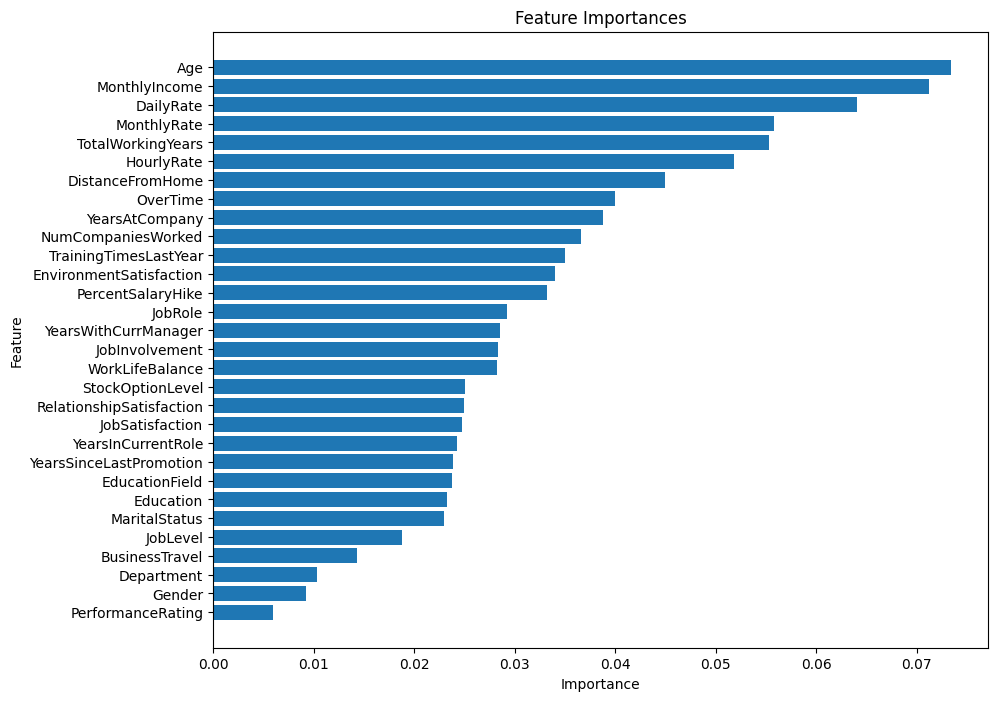

In [74]:
# Visualisasi fitur penting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [75]:
# Filter fitur penting berdasarkan threshold importance
threshold = 0.05
important_features_threshold = feature_importance_df[feature_importance_df['Importance'] > threshold]
important_features = important_features_threshold['Feature'].tolist()

print("Fitur penting berdasarkan threshold (importance > 0.05):")
print(important_features_threshold)

Fitur penting berdasarkan threshold (importance > 0.05):
              Feature  Importance
0                 Age    0.073428
15      MonthlyIncome    0.071244
2           DailyRate    0.064033
16        MonthlyRate    0.055763
23  TotalWorkingYears    0.055289
9          HourlyRate    0.051846


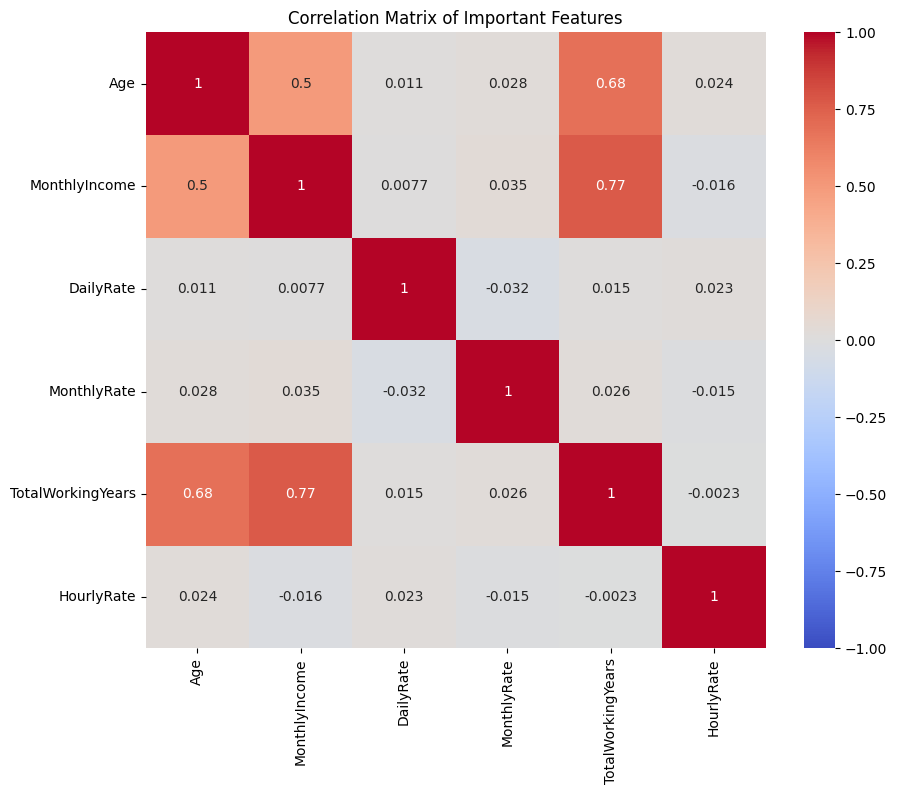

In [76]:
# Hitung matriks korelasi untuk fitur-fitur penting
correlation_matrix = data[important_features].corr()

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Important Features')
plt.show()

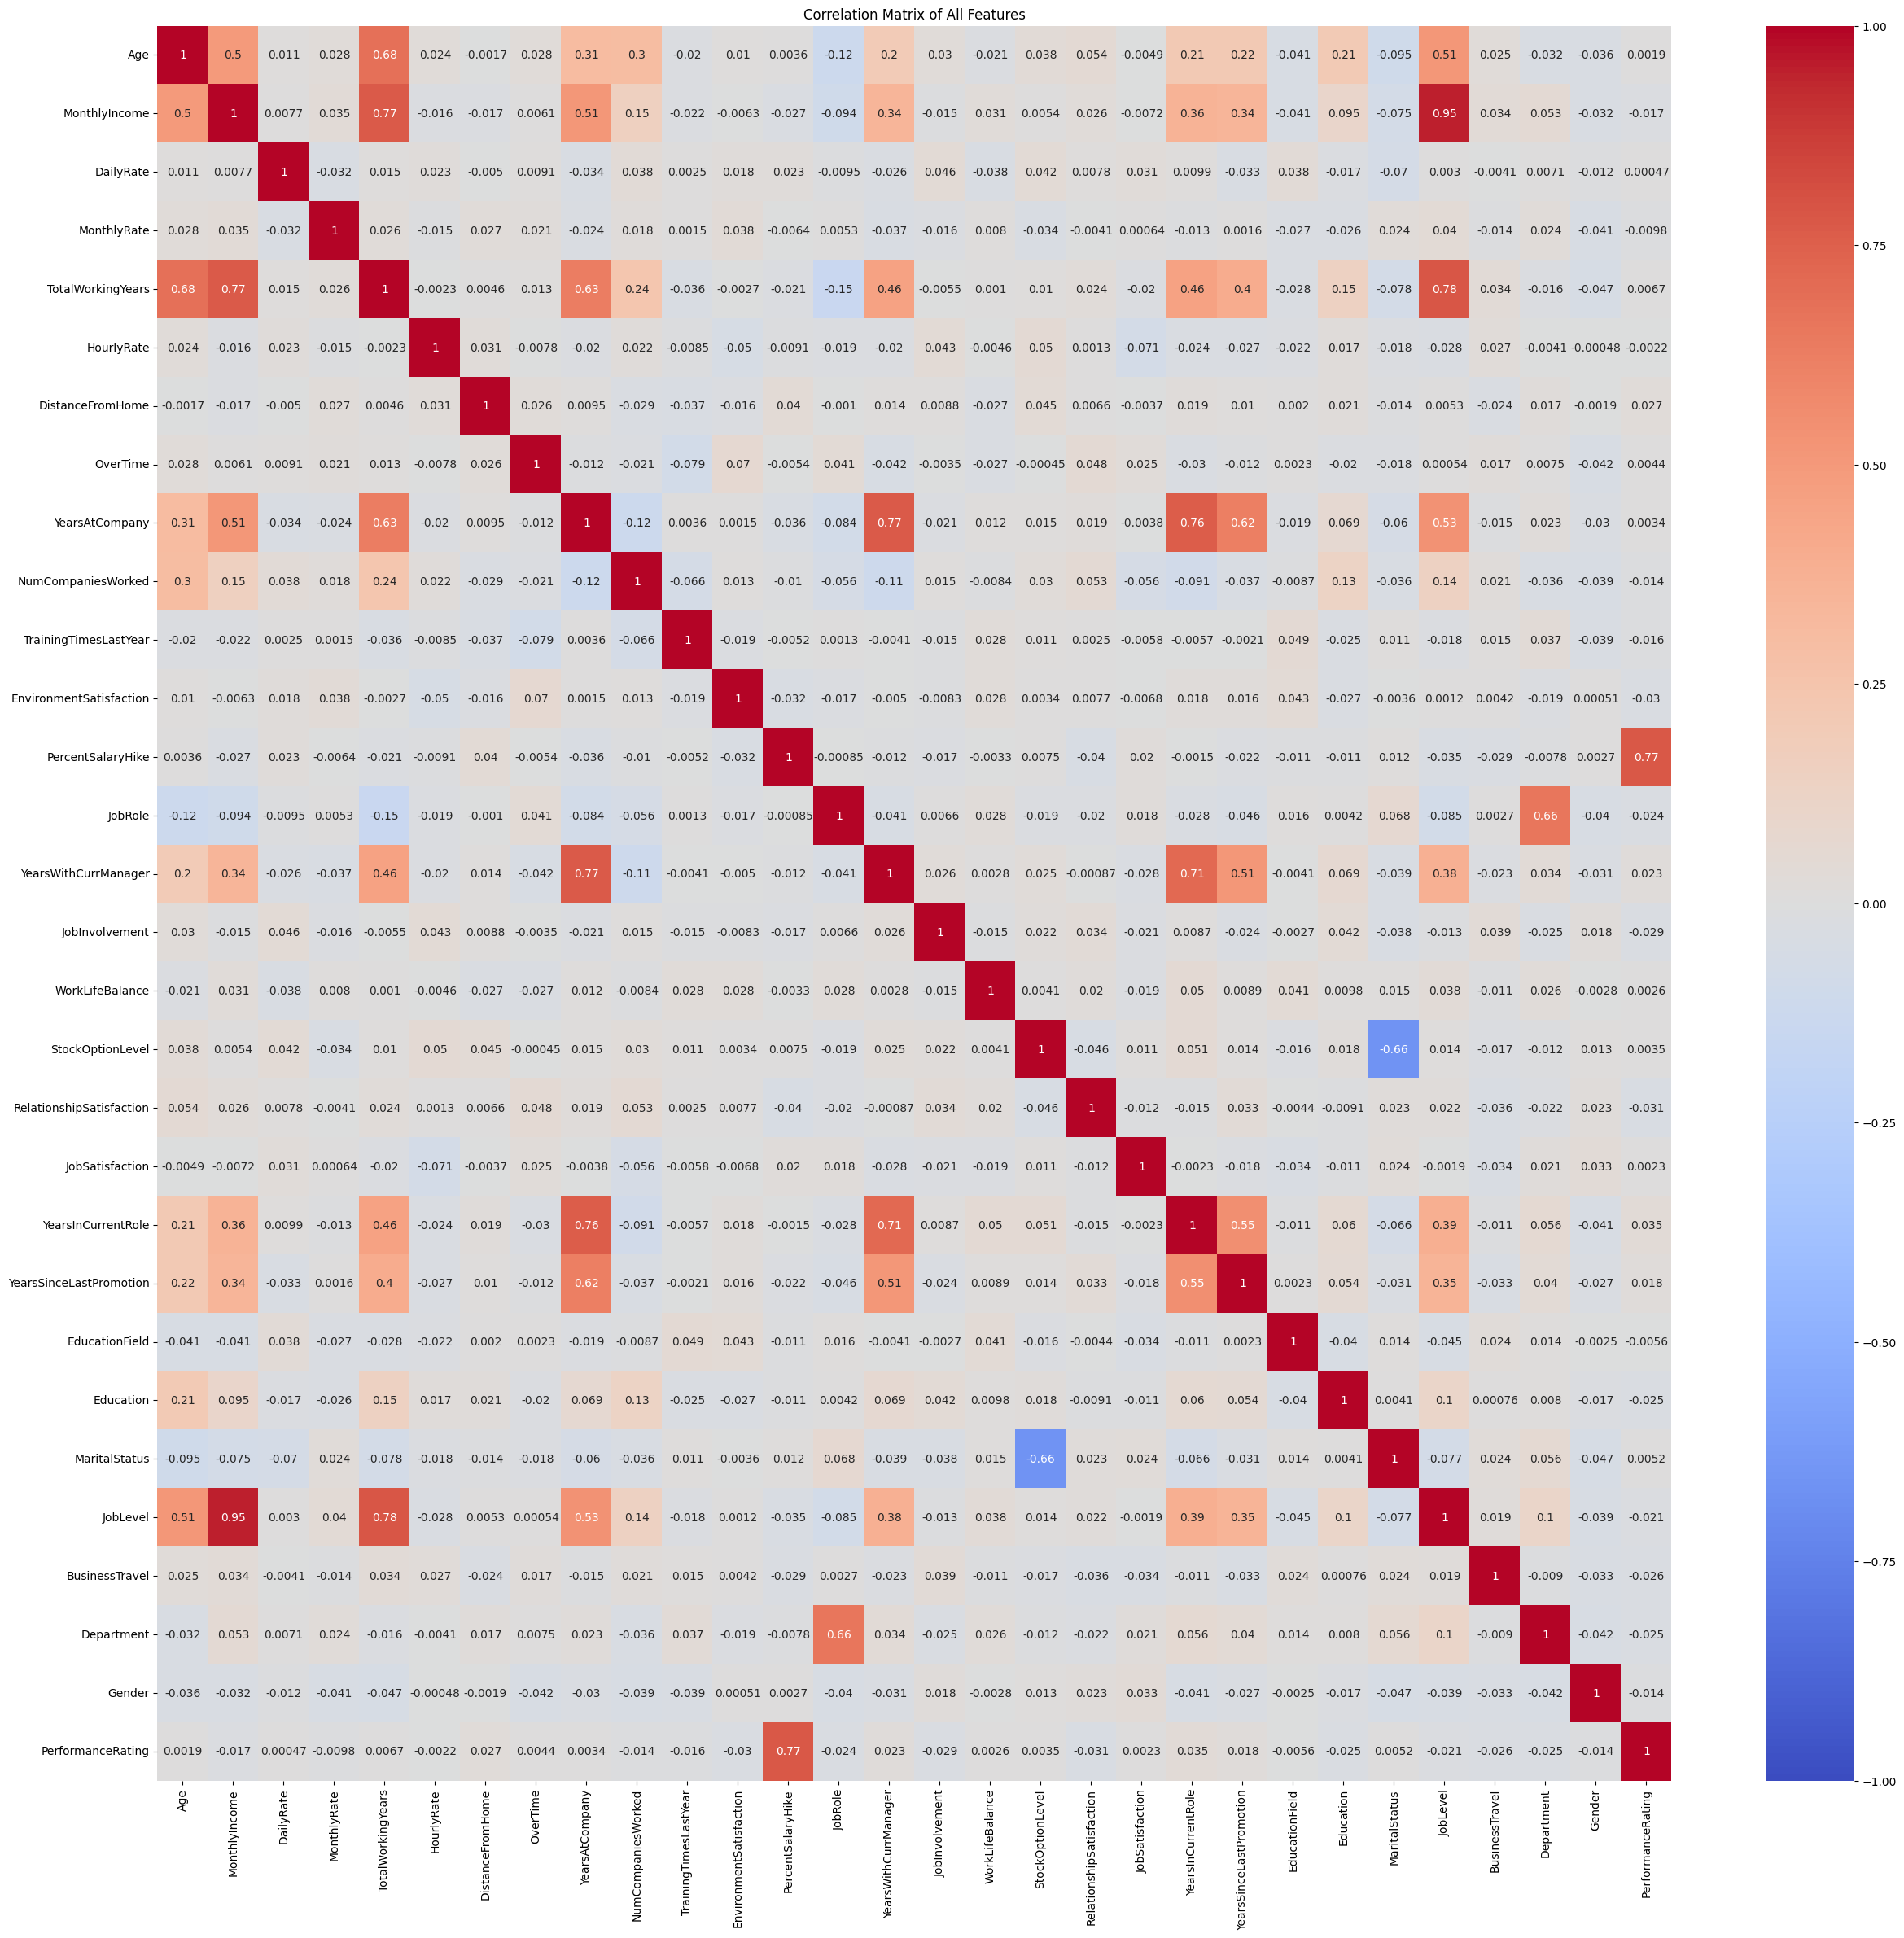

In [77]:
# Ambil semua fitur dari feature_importance_df
all_features = feature_importance_df['Feature'].tolist()

# Identifikasi kolom kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Enkode kolom kategorikal
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Hitung matriks korelasi untuk semua fitur
correlation_matrix = data[all_features].corr()

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of All Features')
plt.show()

In [78]:
# Salin data yang telah diproses tetapi tanpa encoding untuk kolom kategorikal
data_processed = data.copy()

# Tambahkan kolom JoinKey di data hasil pemrosesan
data_processed['JoinKey'] = 1

# Menyimpan data ke dalam file CSV
data_processed.to_csv('data/processed_employee_data.csv', index=False)


In [79]:
# Tambahkan kolom JoinKey di feature importance
feature_importance_df['JoinKey'] = 1

# Menyimpan fitur penting ke dalam file CSV
feature_importance_df.to_csv('data/feature_importance.csv', index=False)